###2.Loading the dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [ ]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.shape

(200, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


###3.Visualization

Univariate analysis

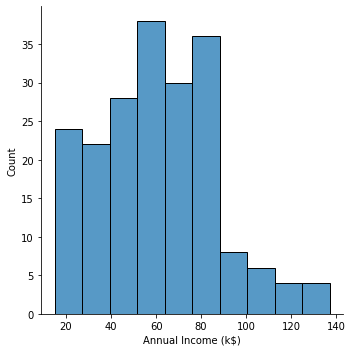

In [ ]:
sns.displot(df['Annual Income (k$)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


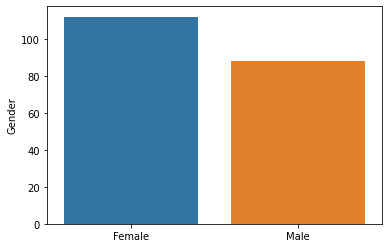

In [ ]:
sns.barplot(df.Gender.value_counts().index,df.Gender.value_counts())

Bivariate analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


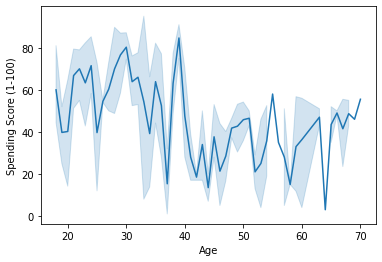

In [ ]:
sns.lineplot(df.Age,df['Spending Score (1-100)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


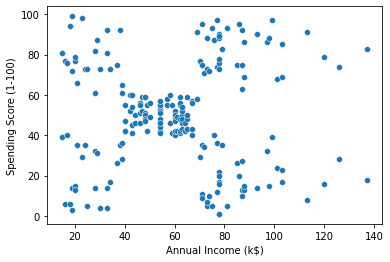

In [ ]:
sns.scatterplot(df['Annual Income (k$)'],df['Spending Score (1-100)'])

Multivariate analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2c5f666850>,
      dtype=object)

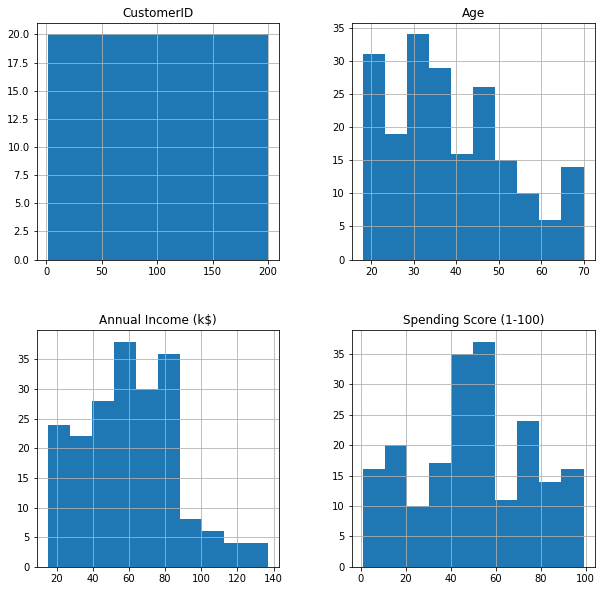

In [ ]:
df.hist(figsize=[10,10])

###4.Descriptive statistics

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


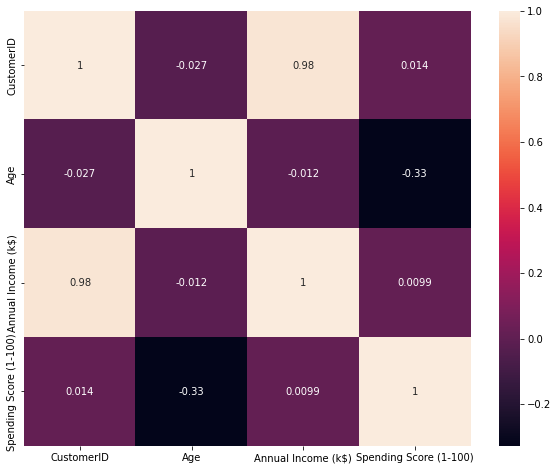

In [ ]:
plt.figure(figsize=[10,8])
sns.heatmap(df.corr(),annot=True)

###5.Missing values

In [ ]:
df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

###6.Finding and replacing outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


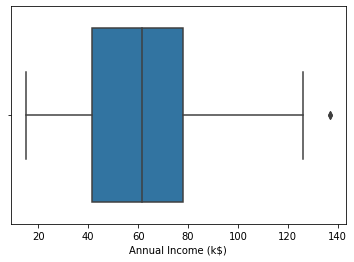

In [ ]:
sns.boxplot(df['Annual Income (k$)'])

In [ ]:
q3=df['Annual Income (k$)'].quantile(0.75)
q1=df['Annual Income (k$)'].quantile(0.25)
iqr=q3-q1

In [ ]:
up_limit=q3+1.5*iqr
lw_limit=q1-1.5*iqr

In [ ]:
df.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


CustomerID                100.5
Age                        36.0
Annual Income (k$)         61.5
Spending Score (1-100)     50.0
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


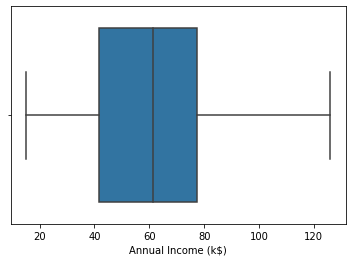

In [ ]:
df['Annual Income (k$)']=np.where(df['Annual Income (k$)']>up_limit,61.5,df['Annual Income (k$)'])
sns.boxplot(df['Annual Income (k$)'])

###7.Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
df.Gender=le.fit_transform(df.Gender)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15.0,39
1,2,1,21,15.0,81
2,3,0,20,16.0,6
3,4,0,23,16.0,77
4,5,0,31,17.0,40


###9.Clustering algorithm

In [ ]:
X=pd.DataFrame(df.iloc[:,[3,4]].values)
X.columns=['Annual Income (k$)','Spending Score (1-100)']
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15.0,39.0
1,15.0,81.0
2,16.0,6.0
3,16.0,77.0
4,17.0,40.0


In [ ]:
from sklearn import cluster

In [ ]:
error =[]
for i in range(1,11):
    kmeans=cluster.KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(X)
    error.append(kmeans.inertia_)

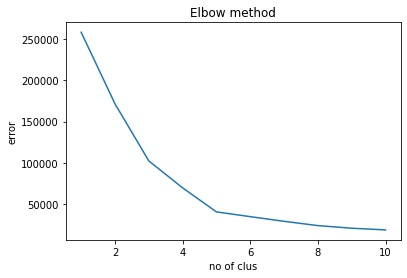

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),error)
plt.title('Elbow method')
plt.xlabel('no of clus')
plt.ylabel('error')
plt.show()

In [ ]:
km_model=cluster.KMeans(n_clusters=5,init='k-means++',random_state=0)

In [ ]:
km_model.fit(X)

KMeans(n_clusters=5, random_state=0)

In [ ]:
ykmeans =km_model.predict(X)
ykmeans

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1,
       3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

###10.Add cluster with primary dataset

In [ ]:
df['kclus'] = pd.Series(ykmeans)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),kclus
0,1,1,19,15.0,39,3
1,2,1,21,15.0,81,4
2,3,0,20,16.0,6,3
3,4,0,23,16.0,77,4
4,5,0,31,17.0,40,3


###11.Split the data into dependent and independent variables

In [ ]:
X=df.drop(columns=['kclus'],axis=1)
X.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15.0,39
1,2,1,21,15.0,81
2,3,0,20,16.0,6
3,4,0,23,16.0,77
4,5,0,31,17.0,40


In [ ]:
y=df['kclus']
y.head()

0    3
1    4
2    3
3    4
4    3
Name: kclus, dtype: int32

###8.Scaling

In [ ]:
from sklearn.preprocessing import scale

In [ ]:
x=pd.DataFrame(scale(X),columns=X.columns)
x.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,-1.723412,1.128152,-1.424569,-1.788777,-0.434801
1,-1.706091,1.128152,-1.281035,-1.788777,1.195704
2,-1.688771,-0.886405,-1.352802,-1.748853,-1.715913
3,-1.671450,-0.886405,-1.137502,-1.748853,1.040418
4,-1.654129,-0.886405,-0.563369,-1.708930,-0.395980


###12.Split the data into train test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(140, 5)
(140,)
(60, 5)
(60,)


###13.Build the model 14.Train the model 15.Test the model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [ ]:
model.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_predtest=model.predict(X_test)
y_predtrain=model.predict(X_train)

###16.Evaluation metric

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
print('Testing accuracy: ',accuracy_score(y_test,y_predtest))
print('Training accuracy: ',accuracy_score(y_train,y_predtrain))

Testing accuracy:  0.9166666666666666
Training accuracy:  0.9785714285714285


In [ ]:
pd.crosstab(y_test,y_predtest)

col_0,0,1,2,3,4
kclus,,,,,
0,11,2,0,0,0
1,0,19,0,0,0
2,0,0,12,0,0
3,0,2,0,9,0
4,0,1,0,0,4


In [ ]:
print(classification_report(y_test,y_predtest))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        13
           1       0.79      1.00      0.88        19
           2       1.00      1.00      1.00        12
           3       1.00      0.82      0.90        11
           4       1.00      0.80      0.89         5

    accuracy                           0.92        60
   macro avg       0.96      0.89      0.92        60
weighted avg       0.93      0.92      0.92        60

